In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 21s 1ms/step - loss: 0.5341 - acc: 0.7901 - val_loss: 0.4088 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 10s 647us/step - loss: 0.3277 - acc: 0.8995 - val_loss: 0.3167 - val_acc: 0.8848
Epoch 3/20
15000/15000 [==============================] - 11s 753us/step - loss: 0.2376 - acc: 0.9239 - val_loss: 0.2833 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 10s 680us/step - loss: 0.1879 - acc: 0.9386 - val_loss: 0.2857 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 12s 808us/step - loss: 0.1512 - acc: 0.9519 - val_loss: 0.2767 - val_acc: 0.8893
Epoch 6/20
15000/15000 [==============================] - 13s 889us/step - loss: 0.1262 - acc: 0.9614 - val_loss: 0.3127 - val_acc: 0.8795
Epoch 7/20
15000/15000 [==============================] - 12s 808us/step - loss: 0.1048 - acc: 0.9683 - val_loss: 0.31

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

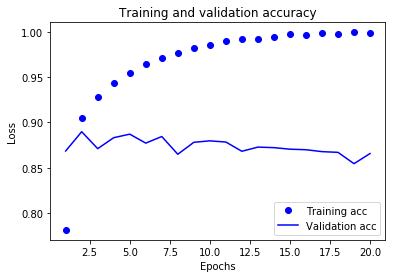

In [12]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
#model.predict(x_test[0:1])
print(x_test[0].shape)
print((x_test[0:1].shape))

(10000,)
(1, 10000)
